|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [2]:
df = pd.read_csv("instagram_users.csv")


In [3]:
df

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_length,Caption_zero,Non_image_percentage,Engagement_rate_like,Engagement_rate_comment,Location_tag_percentage,Average_hashtag_count,Promotional_keywords,Followers_keywords,Cosine_similarity,Post_interval,real_fake
0,44,48,325,33,1,0,12,0.000000,0.000,0.000000,0.00,0.000,0.000,0.0,0.000,0.111111,0.094985,fake
1,10,66,321,150,1,0,213,0.000000,1.000,14.390000,1.97,0.000,1.500,0.0,0.000,0.206826,230.412857,fake
2,33,970,308,101,1,1,436,0.000000,1.000,10.100000,0.30,0.000,2.500,0.0,0.056,0.572174,43.569939,fake
3,70,86,360,14,1,0,0,1.000000,0.000,0.780000,0.06,0.000,0.000,0.0,0.000,1.000000,5.859799,fake
4,3,21,285,73,1,0,93,0.000000,0.000,14.290000,0.00,0.667,0.000,0.0,0.000,0.300494,0.126019,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64239,13,145,642,0,1,0,7,0.461538,0.000,14.270000,0.58,0.000,0.077,0.0,0.000,0.192308,1745.291260,real
64240,652,3000,1300,146,1,1,384,0.000000,0.389,8.520000,0.13,0.000,1.611,0.0,0.000,0.169917,54.629120,real
64241,1500,3700,3200,147,1,1,129,0.000000,0.111,9.390000,0.31,0.722,0.000,0.0,0.056,0.058908,129.802048,real
64242,329,1500,1800,218,1,1,290,0.055556,0.000,6.350000,0.26,0.222,0.500,0.0,0.000,0.103174,53.402840,real


# Q3: Split tha dataset into training and testing

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X=df.drop('real_fake',axis=1)
y=df['real_fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
print(dtree)
dtree.fit(X_train,y_train)

DecisionTreeClassifier()


DecisionTreeClassifier()

In [7]:
pred = dtree.predict(X_test)
pred

array(['fake', 'fake', 'real', ..., 'real', 'real', 'real'], dtype=object)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,pred))
# The support is the number of occurrences of each class in y_test.

              precision    recall  f1-score   support

        fake       0.85      0.86      0.85      9555
        real       0.86      0.85      0.85      9719

    accuracy                           0.85     19274
   macro avg       0.85      0.85      0.85     19274
weighted avg       0.85      0.85      0.85     19274



In [9]:
print(accuracy_score(y_test,pred))

0.8546746912939711


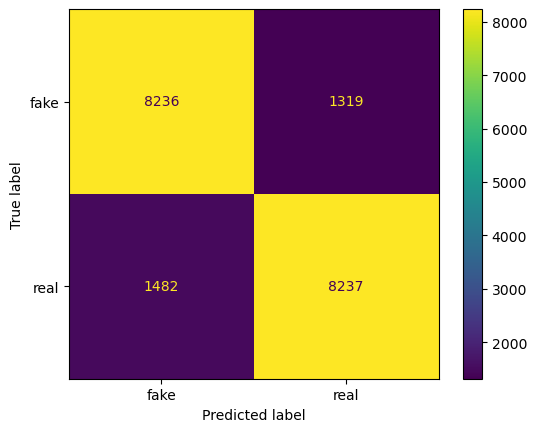

In [10]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree, X_test, y_test);  
plt.show();

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) #n_estimators: The number of trees in the forest.
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
rfc_pred = rfc.predict(X_test)


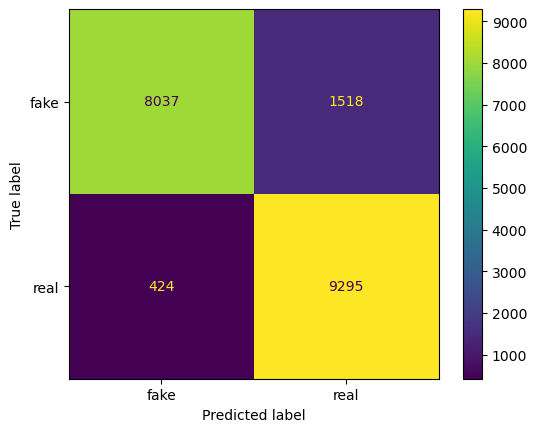

In [13]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

In [14]:
print(classification_report(y_test,rfc_pred))


              precision    recall  f1-score   support

        fake       0.95      0.84      0.89      9555
        real       0.86      0.96      0.91      9719

    accuracy                           0.90     19274
   macro avg       0.90      0.90      0.90     19274
weighted avg       0.90      0.90      0.90     19274



In [15]:
print(accuracy_score(y_test,pred))

0.8546746912939711


## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [16]:
from sklearn.linear_model import LogisticRegression


In [17]:
logic = LogisticRegression()
print(logic)

LogisticRegression()


In [18]:
logic.fit(X_train, y_train)

LogisticRegression()

In [19]:
logicpred = logic.predict(X_test)

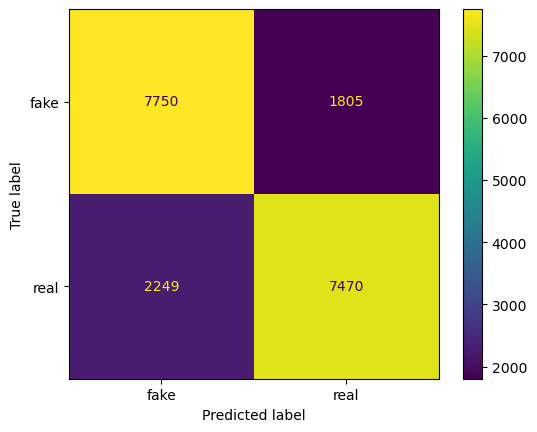

In [20]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(logic, X_test, y_test)  
plt.show()

In [21]:
print(classification_report(y_test,logicpred))


              precision    recall  f1-score   support

        fake       0.78      0.81      0.79      9555
        real       0.81      0.77      0.79      9719

    accuracy                           0.79     19274
   macro avg       0.79      0.79      0.79     19274
weighted avg       0.79      0.79      0.79     19274



In [22]:
print(accuracy_score(y_test,logicpred))

0.7896648334543945
